In [3]:
%matplotlib notebook

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [1]:
# large windows
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# Linearisierung für Gleichgewichte

Untersuche das linearisierte SIDARTHE-System bei Gleichgewichten der Form $I=D=A=R=T=0$ und $S+H+E=1$,  ($S,H,E$ positiv).

Wir erhalten folgende Matrix:

In [6]:
# define symbols for first system
S_1 = sp.symbols('S_1')
alpha_1 = sp.symbols('alpha_1')
beta_1 = sp.symbols('beta_1')
gamma_1 = sp.symbols('gamma_1')
epsilon_1 = sp.symbols('epsilon_1')
zeta_1 = sp.symbols('zeta_1')
lambda_1 = sp.symbols('lambda_1')
theta_1 = sp.symbols('theta_1')
mu_1 = sp.symbols('mu_1')
kappa_1 = sp.symbols('kappa_1')
sigma_1 = sp.symbols('sigma_1')
tau_1 = sp.symbols('tau_1')

# initial symbolic matrix
sp.Matrix([[0, -alpha_1*S_1, -beta_1*S_1, -gamma_1*S_1, -beta_1*S_1, 0, 0, 0],
           [0, alpha_1*S_1-(epsilon_1+zeta_1+lambda_1), beta_1 *
            S_1, gamma_1*S_1, beta_1*S_1, 0, 0, 0],
           [0, epsilon_1, -(zeta_1+lambda_1), 0, 0, 0, 0, 0],
           [0, zeta_1, 0, -(theta_1+mu_1+kappa_1), 0, 0, 0, 0],
           [0, 0, zeta_1, theta_1, -(mu_1+kappa_1), 0, 0, 0],
           [0, 0, 0, mu_1, mu_1, -(sigma_1+tau_1), 0, 0],
           [0, lambda_1, lambda_1, kappa_1, kappa_1, sigma_1, 0, 0],
           [0, 0, 0, 0, 0, tau_1, 0, 0]])

Matrix([
[0,                                -S_1*alpha_1,        -S_1*beta_1,              -S_1*gamma_1,     -S_1*beta_1,                0, 0, 0],
[0, S_1*alpha_1 - epsilon_1 - lambda_1 - zeta_1,         S_1*beta_1,               S_1*gamma_1,      S_1*beta_1,                0, 0, 0],
[0,                                   epsilon_1, -lambda_1 - zeta_1,                         0,               0,                0, 0, 0],
[0,                                      zeta_1,                  0, -kappa_1 - mu_1 - theta_1,               0,                0, 0, 0],
[0,                                           0,             zeta_1,                   theta_1, -kappa_1 - mu_1,                0, 0, 0],
[0,                                           0,                  0,                      mu_1,            mu_1, -sigma_1 - tau_1, 0, 0],
[0,                                    lambda_1,           lambda_1,                   kappa_1,         kappa_1,          sigma_1, 0, 0],
[0,                      

Wir vereinfachen die Matrix noch indem wir einige Spalten und Zeilen entfernen, denn wir können sofort drei mal den Eigenwert $0$ ablesen.

Bemerkung: wir könnten auch noch den Eigenwert $-\sigma-\tau$ ablesen.

Außerdem soll in dieser Analyse immer $\alpha = \gamma$ gelten.

Wir erhalten folgende Matrix:

In [7]:
# smaller symbolic matrix
sp.Matrix([[alpha_1*S_1-(epsilon_1+zeta_1+lambda_1), beta_1*S_1, alpha_1*S_1, beta_1*S_1, 0],
           [epsilon_1, -(zeta_1+lambda_1), 0, 0, 0],
           [zeta_1, 0, -(theta_1+mu_1+kappa_1), 0, 0],
           [0, zeta_1, theta_1, -(mu_1+kappa_1), 0],
           [0, 0, mu_1, mu_1, -(sigma_1+tau_1)]])

Matrix([
[S_1*alpha_1 - epsilon_1 - lambda_1 - zeta_1,         S_1*beta_1,               S_1*alpha_1,      S_1*beta_1,                0],
[                                  epsilon_1, -lambda_1 - zeta_1,                         0,               0,                0],
[                                     zeta_1,                  0, -kappa_1 - mu_1 - theta_1,               0,                0],
[                                          0,             zeta_1,                   theta_1, -kappa_1 - mu_1,                0],
[                                          0,                  0,                      mu_1,            mu_1, -sigma_1 - tau_1]])

In vorherigen Überlegungen haben wir gesehen, dass $\alpha$ (sowie $\gamma$) zu den wichtigsten Parametern im SIDARTHE-System zählen.

Im folgenden schauen wir uns deshalb Eigenwerte der obigen Matrix in Abhängigkeit von $\alpha$ für verschiedene Gleichgewichte an. Wir müssen dazu nur $S$ variieren, denn $H$ und $E$ haben keinen Eifluss auf die Eigenwerte.
Wir erhalten also fünf Eigenwerte in Abhängigkeit von $\alpha$ und $S$:

In [8]:
# load class parameters (contains default parameters)
class Parameters8:
    """
    A class to save all default parameters for SIDARTHE calculations with 8 equations.

    Args:
        arg1    (type): description
    Attributes:
        att1    (type): description
    """

    def __init__(self,
                 alpha: float = 0.15,
                 beta: float = 0.008443847910426,
                 gamma: float = 0.15,
                 epsilon: float = 0.0,
                 zeta: float = 0.079018779922852,
                 theta: float = 0.198057106656095,
                 kappa: float = 0.056288791238505,
                 my_lambda: float = 0.059610666036892,
                 mu: float = 0.007998690003693 + 0.005027246740356,
                 sigma: float = 0.007998690003693 /
                 (0.007998690003693 + 0.005027246740356) * 0.037040181047319 +
                 0.005027246740356 /
                 (0.007998690003693 + 0.005027246740356) * 0.055231044651498,
                 tau: float = 0.007998690003693 /
                 (0.007998690003693 + 0.005027246740356) * 0.015874367480393 +
                 0.005027246740356 /
                 (0.007998690003693 + 0.005027246740356) * 0.024198833665235,
                 n_total: int = 83000000,
                 y0_abs: list = [
                     82636256, 20581, 0, 8041, 41931, 11469, 276911, 4810
                 ]):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.epsilon = epsilon
        self.zeta = zeta
        self.theta = theta
        self.kappa = kappa
        self.my_lambda = my_lambda
        self.mu = mu
        self.sigma = sigma
        self.tau = tau
        self.n_total = n_total
        self.y0_abs = y0_abs

        self.y0 = [x / self.n_total for x in self.y0_abs]

In [9]:
# calculate eigenvalues
p = Parameters8()

beta1 = sp.N(p.beta)
epsilon1 = sp.N(p.epsilon)
zeta1 = sp.N(p.zeta)
lambda1 = sp.N(p.my_lambda)
theta1 = sp.N(p.theta)
mu1 = sp.N(p.mu)
kappa1 = sp.N(p.kappa)
sigma1 = sp.N(p.sigma)
tau1 = sp.N(p.tau)

A = sp.Matrix([[alpha_1*S_1-(epsilon1+zeta1+lambda1), beta1*S_1, alpha_1*S_1, beta1*S_1, 0],
               [epsilon1, -(zeta1+lambda1), 0, 0, 0],
               [zeta1, 0, -(theta1+mu1+kappa1), 0, 0],
               [0, zeta1, theta1, -(mu1+kappa1), 0],
               [0, 0, mu1, mu1, -(sigma1+tau1)]])

eigenvalues = A.eigenvals(multiple=True)

In [10]:
# generate data matrix from symbolic eigenvalues (slow; steps=30)
steps = 30
x = np.arange(0, 1, 1/(steps+1))
y = np.arange(0, 1, 1/(steps+1))

X, Y = np.meshgrid(x, y)
Z = np.empty((steps+1, steps+1, len(eigenvalues)))

for i in range(len(eigenvalues)):
    temp1 = eigenvalues[i]
    for index_1, value_1 in enumerate(x):
        temp2 = temp1.subs(S_1, value_1)
        for index_2, value_2 in enumerate(y):
            Z[index_1, index_2, i] = sp.re(temp2.subs(alpha_1, value_2))

<IPython.core.display.Javascript object>


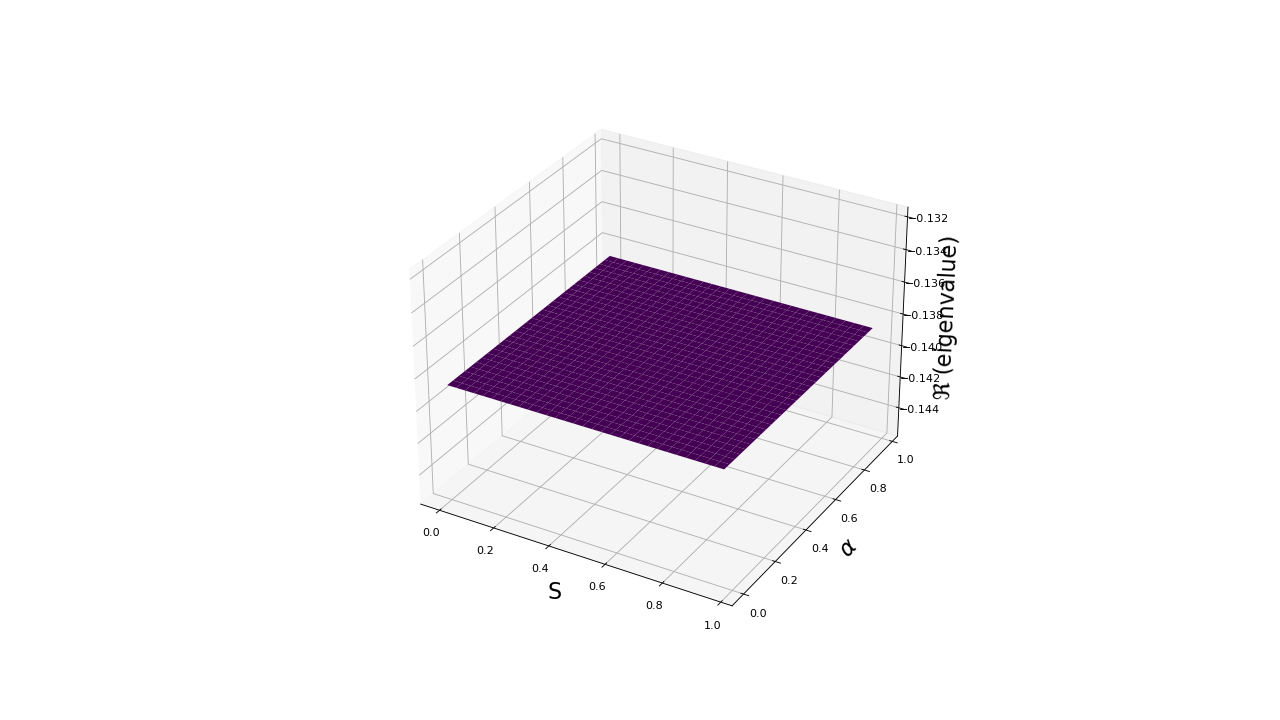

<IPython.core.display.Javascript object>


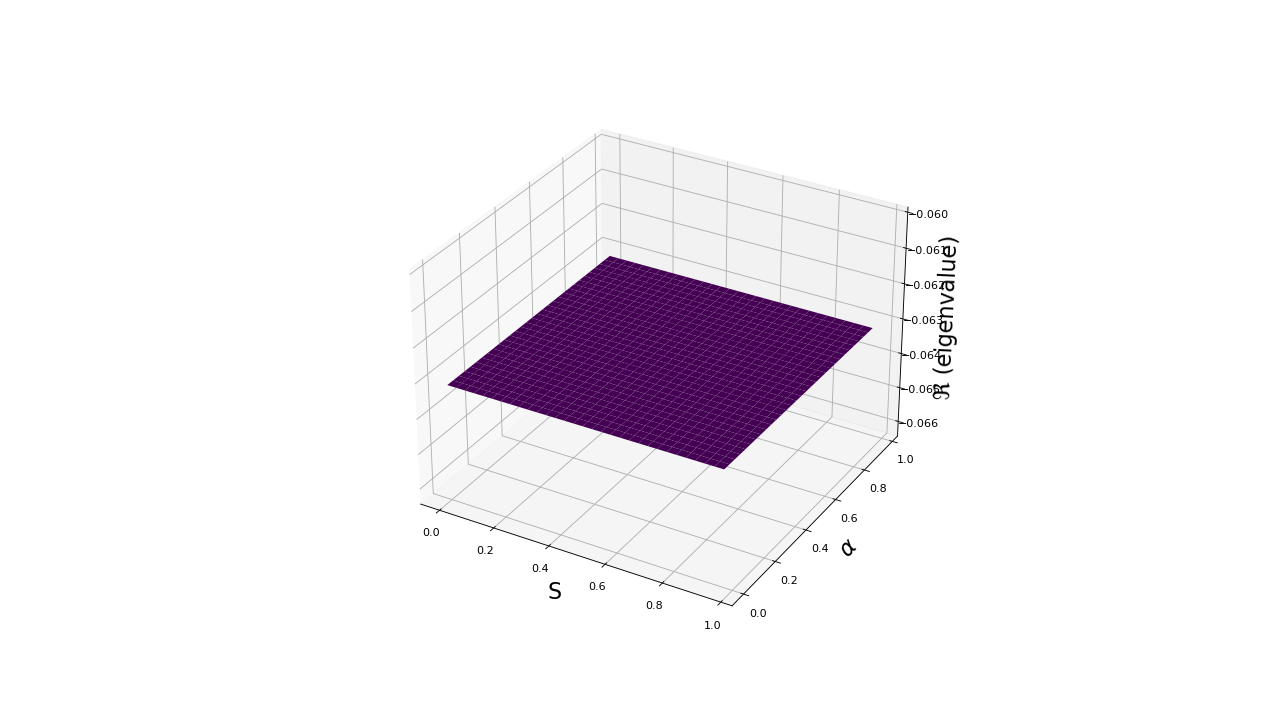

<IPython.core.display.Javascript object>


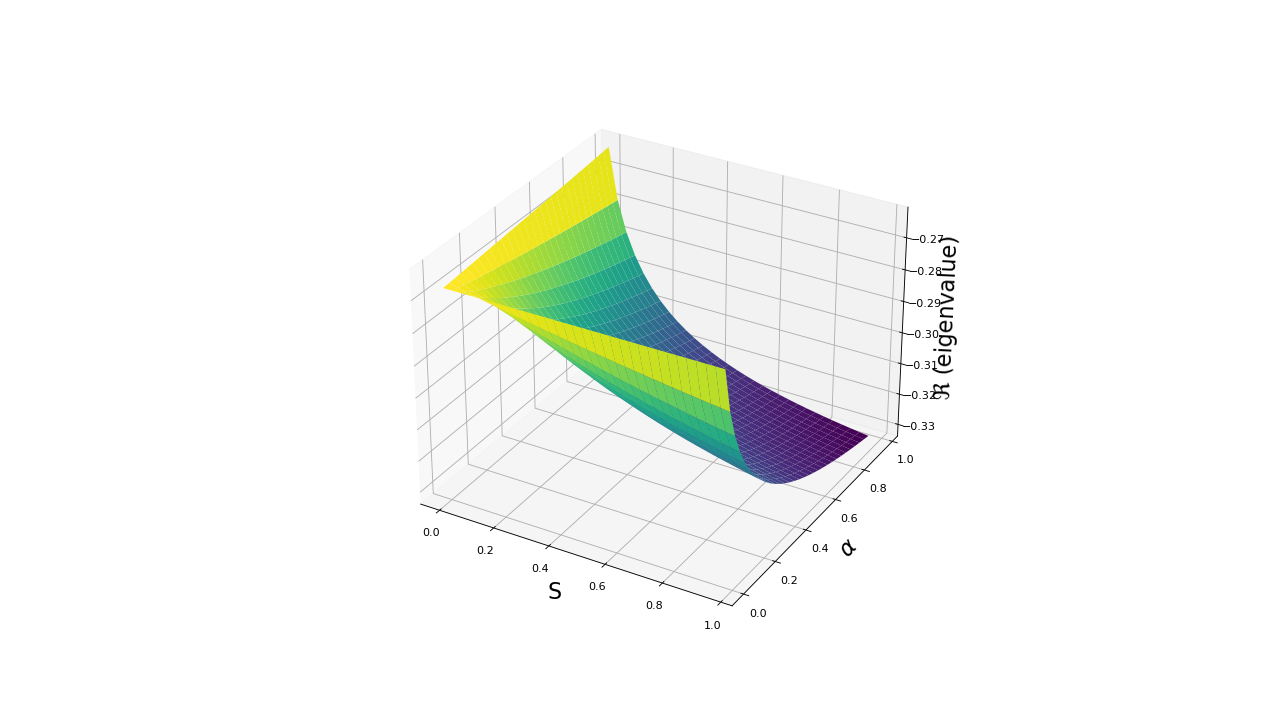

<IPython.core.display.Javascript object>


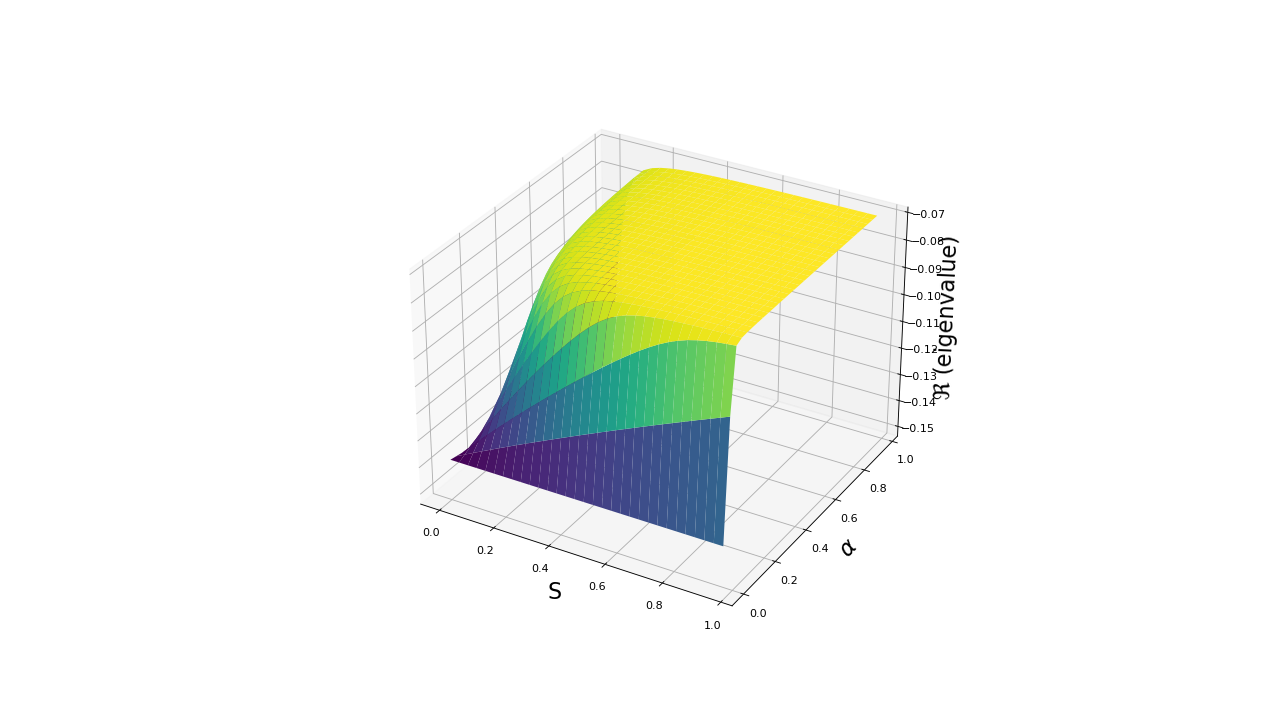

<IPython.core.display.Javascript object>


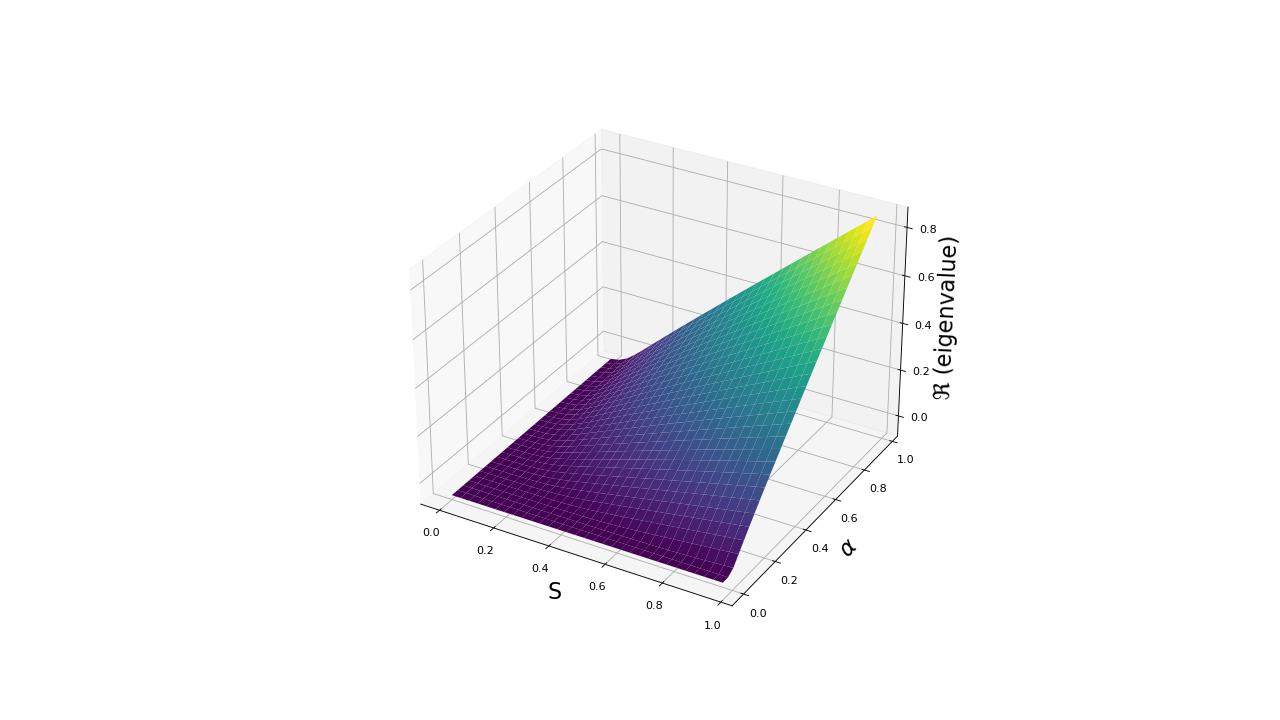

In [11]:
# plot data (needs maual reload)
for i in range(len(eigenvalues)):
    fig = plt.figure(figsize=(16, 9), dpi=80)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, np.squeeze(
        Z[:, :, i]), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('S', fontsize=20)
    ax.set_ylabel(r'$\alpha$', fontsize=20)
    ax.set_zlabel(r'$\Re$ (eigenvalue)', fontsize=20)

Schauen wir uns nun zwei Systeme an. Wir wollen diese wie folgt koppeln:

Infizierte (infected) $I_1$ aus dem ersten System können Anfällige (suscptible) $S_2$ aus dem zweiten System anstecken. Die Ansteckungsrate nennen wir $\pi_{1}$ ("infiziert vom System 1").

Genauso können Infizierte (infected) $I_2$ aus dem zweiten System Anfällige (suscptible) $S_1$ aus dem ersten System anstecken. Diese Ansteckungsrate nennen wir $\pi_{2}$.

Betrachten wir hier wieder die vereinfachte Linearisierung, wobei wir nun weitere Zeilen und Spalten der trivialen Eigenwerte $-\sigma_1-\tau_1$ und  $-\sigma_2-\tau_2$ weglassen.

Wir erhalten die folgende Matrix:

In [12]:
# define symbols for both systems

S_1 = sp.symbols('S_1')
alpha_1 = sp.symbols('alpha_1')
beta_1 = sp.symbols('beta_1')
gamma_1 = sp.symbols('gamma_1')
epsilon_1 = sp.symbols('epsilon_1')
zeta_1 = sp.symbols('zeta_1')
lambda_1 = sp.symbols('lambda_1')
theta_1 = sp.symbols('theta_1')
mu_1 = sp.symbols('mu_1')
kappa_1 = sp.symbols('kappa_1')
sigma_1 = sp.symbols('sigma_1')
tau_1 = sp.symbols('tau_1')

S_2 = sp.symbols('S_2')
alpha_2 = sp.symbols('alpha_2')
beta_2 = sp.symbols('beta_2')
epsilon_2 = sp.symbols('epsilon_2')
zeta_2 = sp.symbols('zeta_2')
lambda_2 = sp.symbols('lambda_2')
theta_2 = sp.symbols('theta_2')
mu_2 = sp.symbols('mu_2')
kappa_2 = sp.symbols('kappa_2')
sigma_2 = sp.symbols('sigma_2')
tau_2 = sp.symbols('tau_2')

pi_1 = sp.symbols("pi_1")
pi_2 = sp.symbols("pi_2")

In [13]:
# symbolic matrix
sp.Matrix([[alpha_1*S_1-(epsilon_1+zeta_1+lambda_1), beta_1*S_1, alpha_1*S_1, beta_1*S_1, pi_2 * S_1,  0, 0, 0],
           [epsilon_1, -(zeta_1+lambda_1), 0, 0, 0, 0, 0, 0],
           [zeta_1, 0, -(theta_1+mu_1+kappa_1), 0, 0, 0, 0, 0],
           [0, zeta_1, theta_1, -(mu_1+kappa_1), 0, 0, 0, 0],
           [pi_1 * S_2, 0, 0, 0, alpha_2*S_2 -
               (epsilon_2+zeta_2+lambda_2), beta_2*S_2, alpha_2*S_2, beta_1*S_2],
           [0, 0, 0, 0, epsilon_2, -(zeta_2+lambda_2), 0, 0],
           [0, 0, 0, 0, zeta_2, 0, -(theta_2+mu_1+kappa_2), 0],
           [0, 0, 0, 0, 0, zeta_2, theta_2, -(mu_2+kappa_2)]
           ])

Matrix([
[S_1*alpha_1 - epsilon_1 - lambda_1 - zeta_1,         S_1*beta_1,               S_1*alpha_1,      S_1*beta_1,                                    S_1*pi_2,                  0,                         0,               0],
[                                  epsilon_1, -lambda_1 - zeta_1,                         0,               0,                                           0,                  0,                         0,               0],
[                                     zeta_1,                  0, -kappa_1 - mu_1 - theta_1,               0,                                           0,                  0,                         0,               0],
[                                          0,             zeta_1,                   theta_1, -kappa_1 - mu_1,                                           0,                  0,                         0,               0],
[                                   S_2*pi_1,                  0,                         0,               0, S

Dieses System könnnen wir nicht mehr allgemein lösen. Mit den hier benutzten Methoden ist es aber glücklicherweise möglich, zumindest die relevanten Eigenwerte richtig sortiert darzustellen.

Wir berechnen nun die Eigenwerte in Abhängigkeit von $\pi_1$ und $\pi_2$.

Wir setzten $S_1 = S_2 = 0.9$, $\alpha_1 = 0.3$ und $\alpha_2 = 0.4$. Für diese Werte hätten die einzelnen Systeme je einen Eigenwert mit positiven Relteil. Die anderen Parameter bleiben ihre jeweiligen Standardwerte.

Das charakteristische Polynom sieht wie folgt aus:

In [14]:
# calculate characteristic polynom
p = Parameters8()

S1 = sp.N(0.9)
alpha1 = sp.N(0.3)
beta1 = sp.N(p.beta)
epsilon1 = sp.N(p.epsilon)
zeta1 = sp.N(p.zeta)
lambda1 = sp.N(p.my_lambda)
theta1 = sp.N(p.theta)
mu1 = sp.N(p.mu)
kappa1 = sp.N(p.kappa)
sigma1 = sp.N(p.sigma)
tau1 = sp.N(p.tau)

S2 = sp.N(0.9)
alpha2 = sp.N(0.4)
beta2 = sp.N(p.beta)
epsilon2 = sp.N(p.epsilon)
zeta2 = sp.N(p.zeta)
lambda2 = sp.N(p.my_lambda)
theta2 = sp.N(p.theta)
mu2 = sp.N(p.mu)
kappa2 = sp.N(p.kappa)
sigma2 = sp.N(p.sigma)
tau2 = sp.N(p.tau)

pi_1 = sp.symbols("pi_1")
pi_2 = sp.symbols("pi_2")

M = sp.Matrix([[alpha1*S1-(epsilon1+zeta1+lambda1), beta1*S1, alpha1*S1, beta1*S1, pi_2 * S1,  0, 0, 0],
               [epsilon1, -(zeta1+lambda1), 0, 0, 0, 0, 0, 0],
               [zeta1, 0, -(theta1+mu1+kappa1), 0, 0, 0, 0, 0],
               [0, zeta1, theta1, -(mu1+kappa1), 0, 0, 0, 0],
               [pi_1 * S2, 0, 0, 0, alpha2*S2 -
                (epsilon2+zeta2+lambda2), beta2*S2, alpha2*S2, beta1*S2],
               [0, 0, 0, 0, epsilon2, -(zeta2+lambda2), 0, 0],
               [0, 0, 0, 0, zeta2, 0, -(theta2+mu1+kappa2), 0],
               [0, 0, 0, 0, 0, zeta2, theta2, -(mu2+kappa2)]
               ])

charpoly = M.charpoly()
charpoly

PurePoly(1.0*lambda**8 + 0.597890909081382*lambda**7 + (-0.81*pi_1*pi_2 + 0.000313013136778881)*lambda**6 + (-0.770011933901134*pi_1*pi_2 - 0.0567150710700853)*lambda**5 + (-0.288635613245628*pi_1*pi_2 - 0.00898271434072979)*lambda**4 + (-0.0543726280064283*pi_1*pi_2 + 0.000617576615051655)*lambda**3 + (-0.00542244124478664*pi_1*pi_2 + 0.000243106430900837)*lambda**2 + (-0.000271399524521465*pi_1*pi_2 + 1.90666208222217e-5)*lambda - 5.34660810800435e-6*pi_1*pi_2 + 4.79957052536254e-7, lambda, domain='RR[pi_1,pi_2]')

In [15]:
# calculate data from polynom (slow; steps=30)
# why is it broken now? smooth graphs before!
#calculate resulte and save them!
steps = 30

pi1 = np.arange(0, 1, 1/(steps+1))
pi2 = np.arange(0, 1, 1/(steps+1))
X, Y = np.meshgrid(pi1, pi2)

results = np.empty(((steps+1), (steps+1), 8))

for index_1, val_1 in enumerate(pi1):
    temp = charpoly.subs([("pi_1", val_1)])
    for index_2, val_2 in enumerate(pi2):
        results[index_1, index_2, :] = np.array(
            [sp.re(eig) for eig in sp.solve(temp.subs("pi_2", val_2))])

<IPython.core.display.Javascript object>


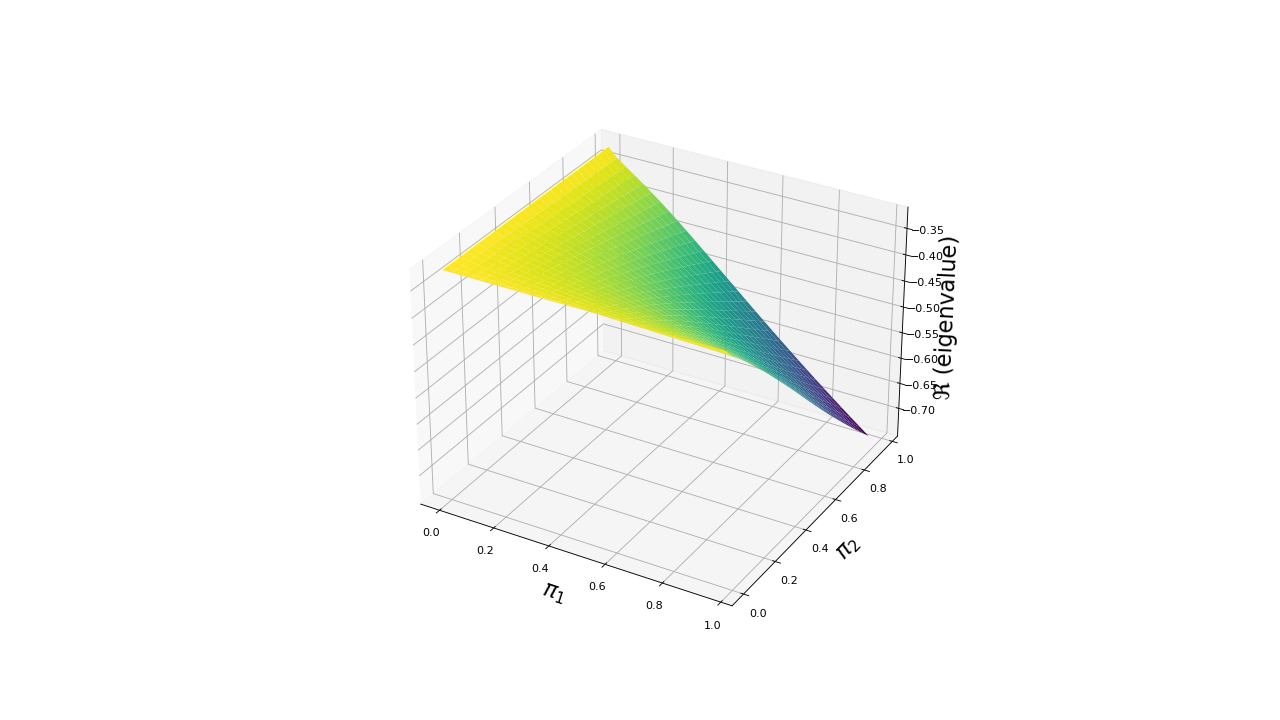

<IPython.core.display.Javascript object>


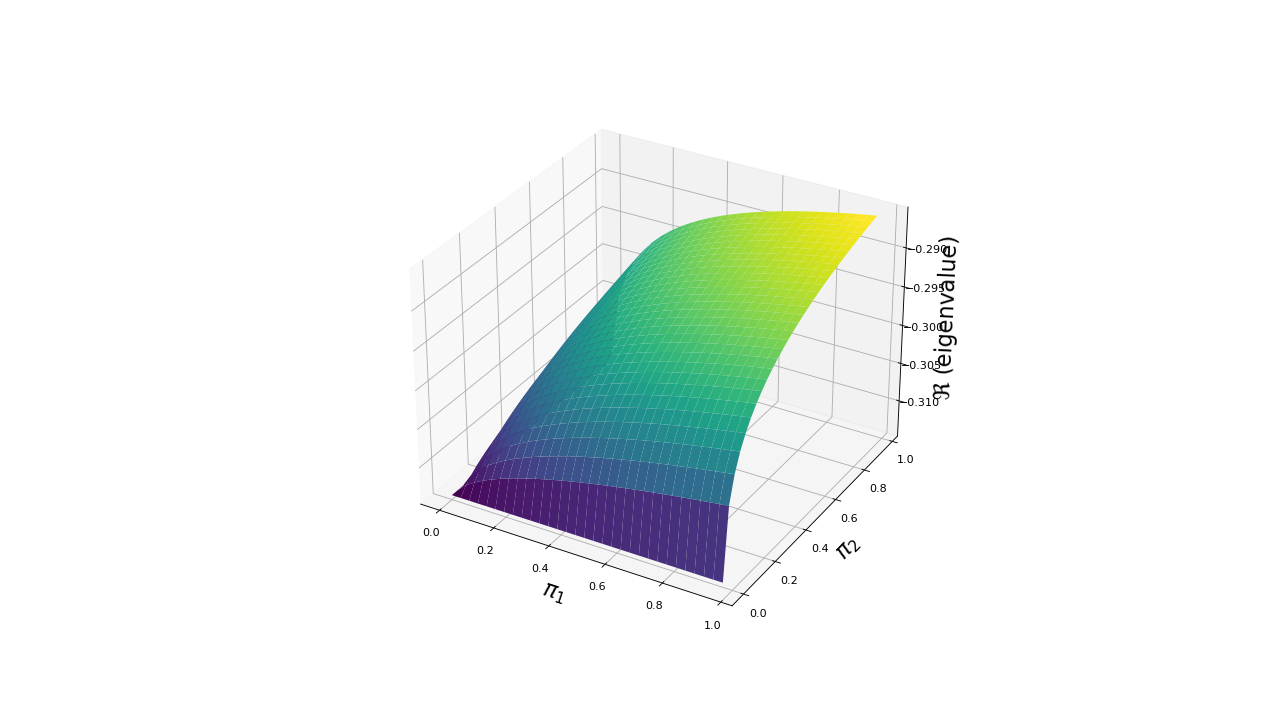

<IPython.core.display.Javascript object>


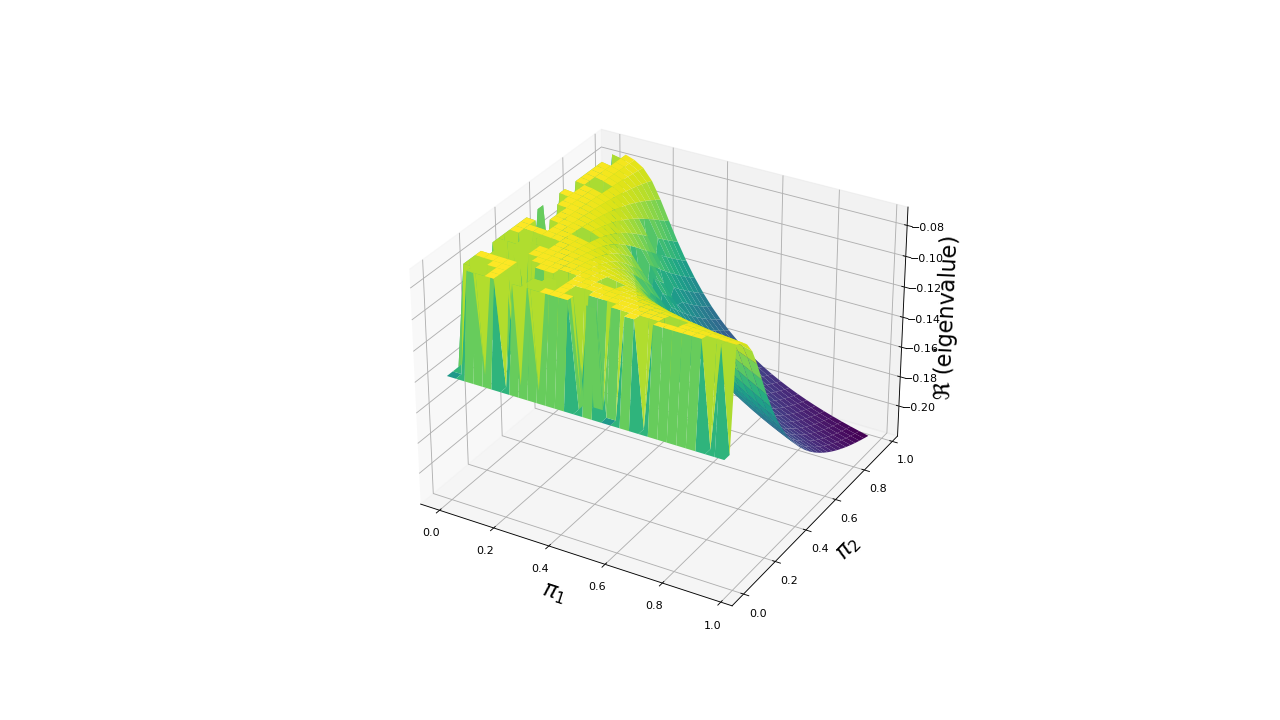

<IPython.core.display.Javascript object>


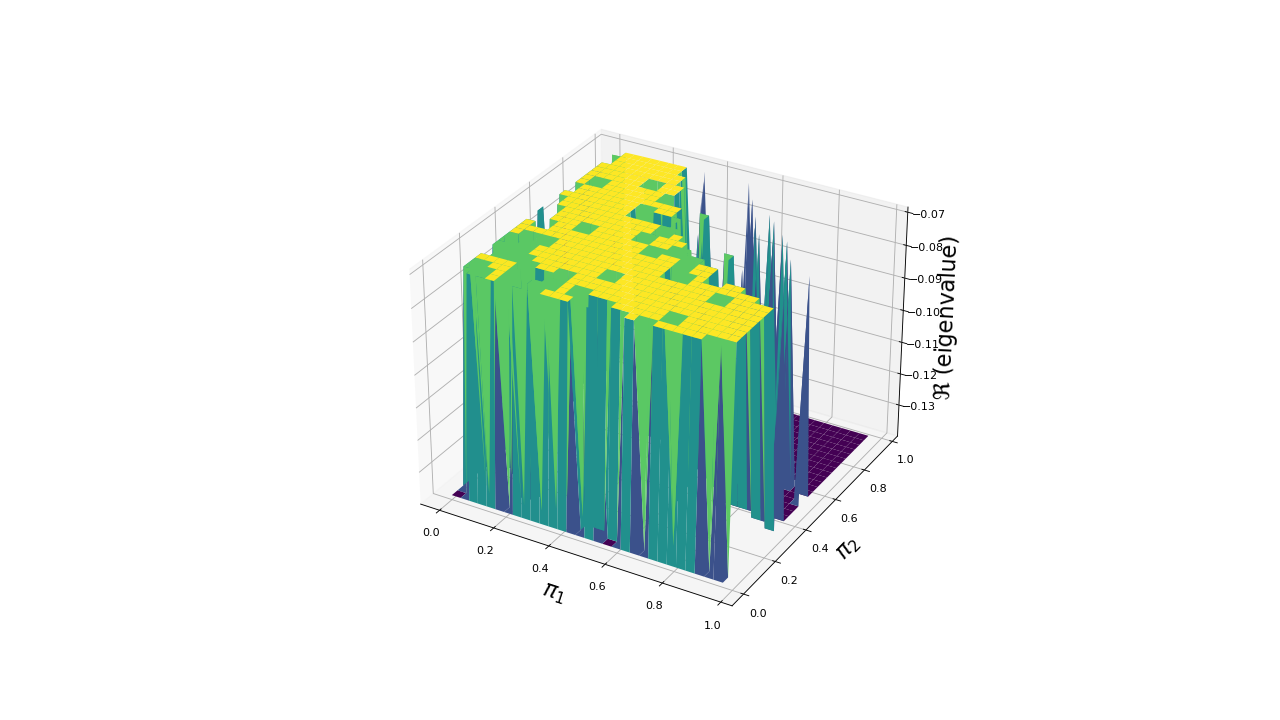

<IPython.core.display.Javascript object>


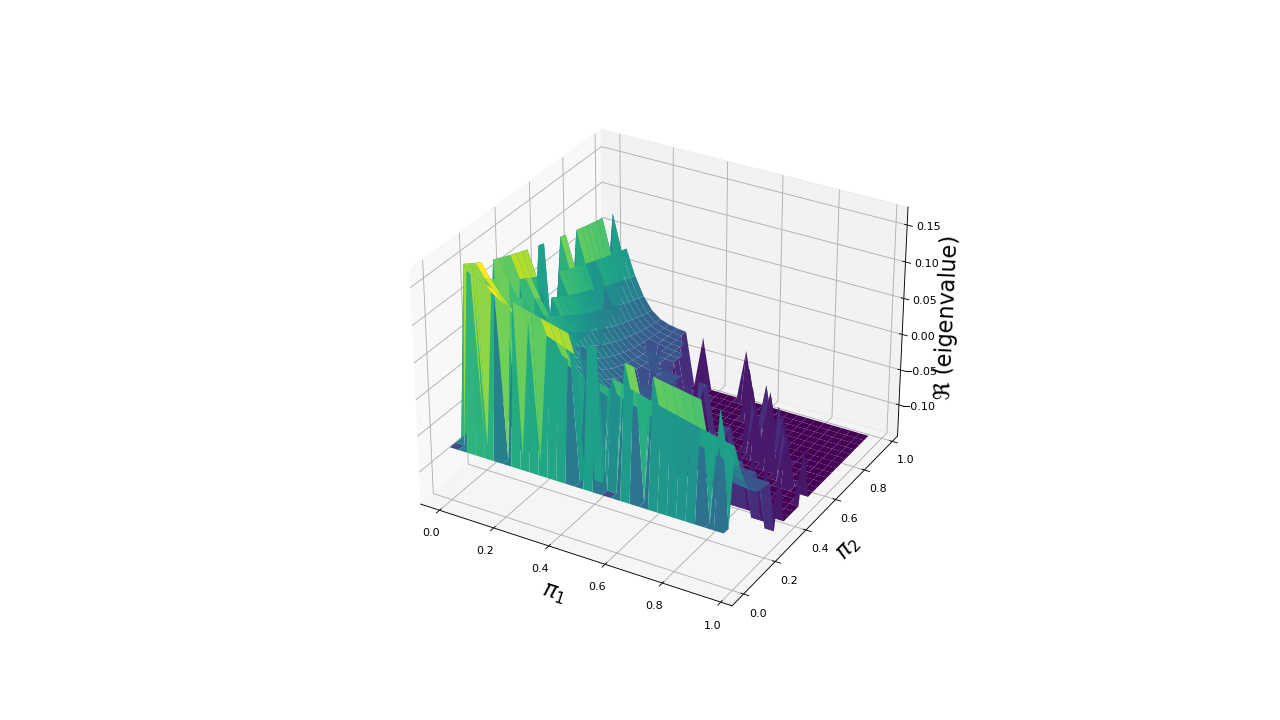

<IPython.core.display.Javascript object>


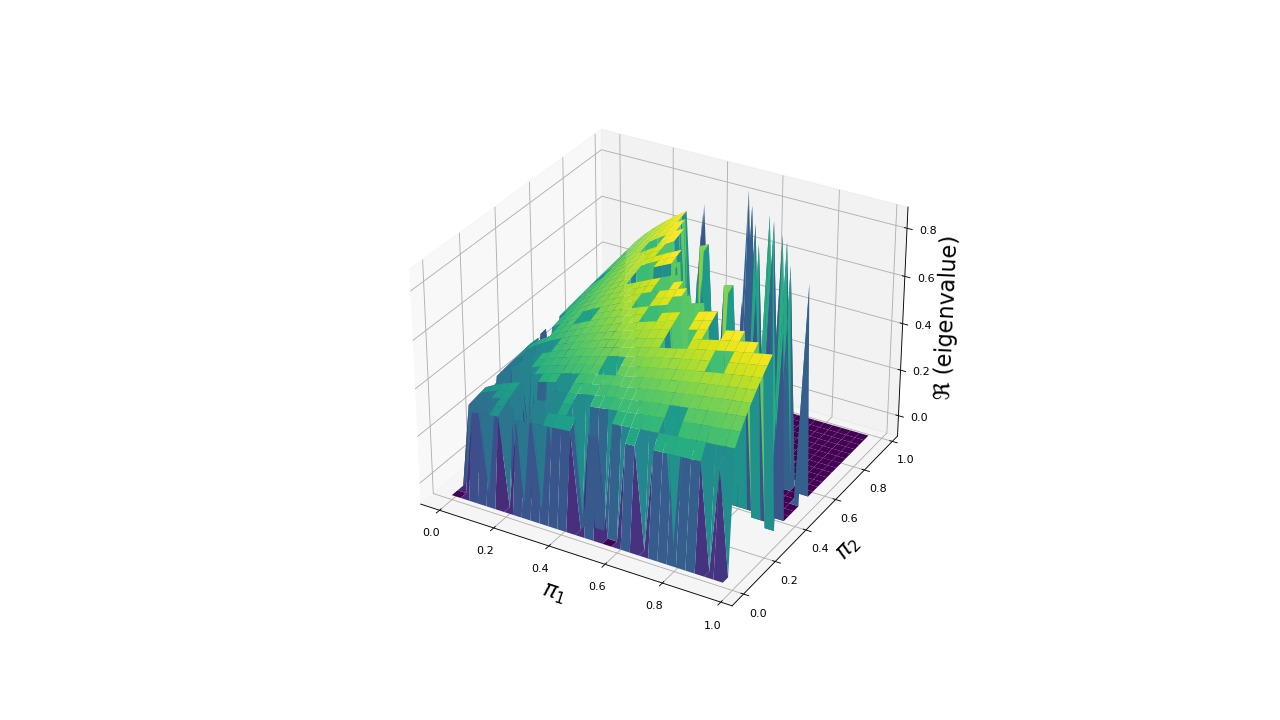

<IPython.core.display.Javascript object>


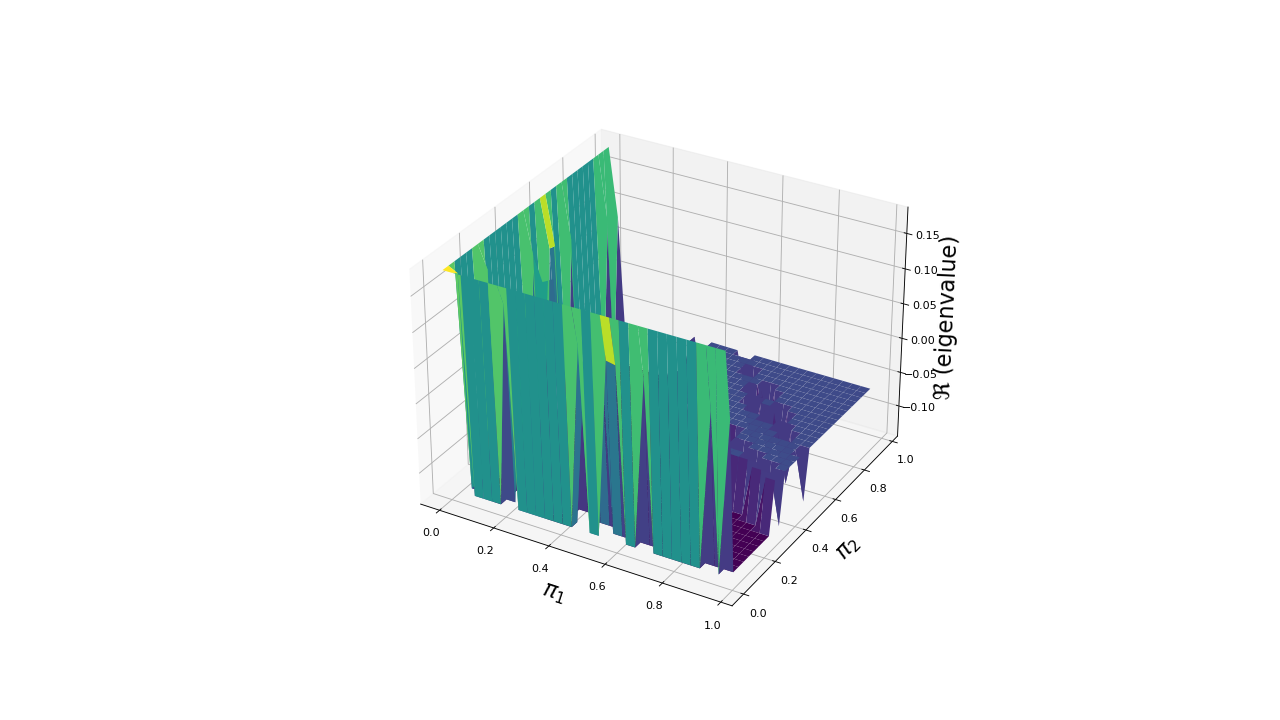

<IPython.core.display.Javascript object>


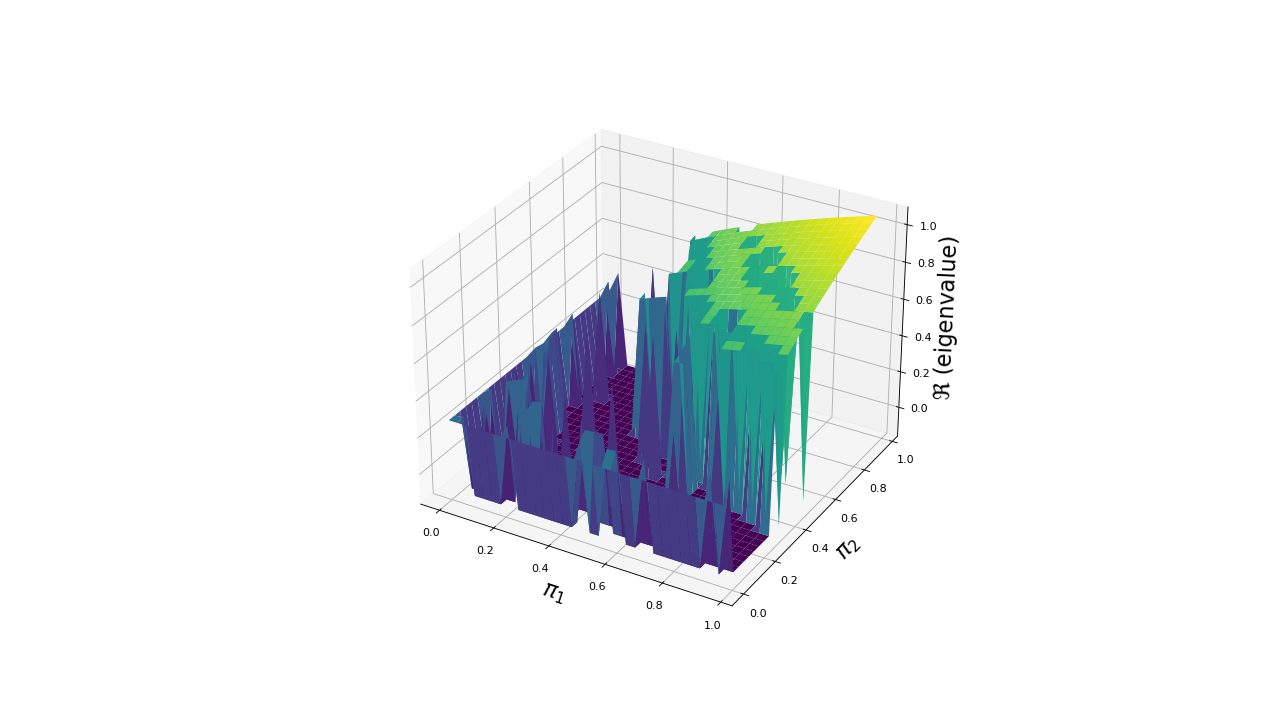

In [16]:
# plot data (needs maual reload)
for i in range(8):
    fig = plt.figure(figsize=(16, 9), dpi=80)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, np.squeeze(
        results[:, :, i]), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel(r'$\pi_1$', fontsize=20)
    ax.set_ylabel(r'$\pi_2$', fontsize=20)
    ax.set_zlabel(r'$\Re$ (eigenvalue)', fontsize=20)

Um leichter zu sehen, für welche Werte für $\pi_1$ und $\pi_2$ der Realteil des interessanten Eigenwerts kleiner $0$ wird, zeigt die folgende Grafik die Anzahl der Eigenwerte mit positivem Realteil in Abhängigkeit von $\pi_1$ und $\pi_2$:

<IPython.core.display.Javascript object>


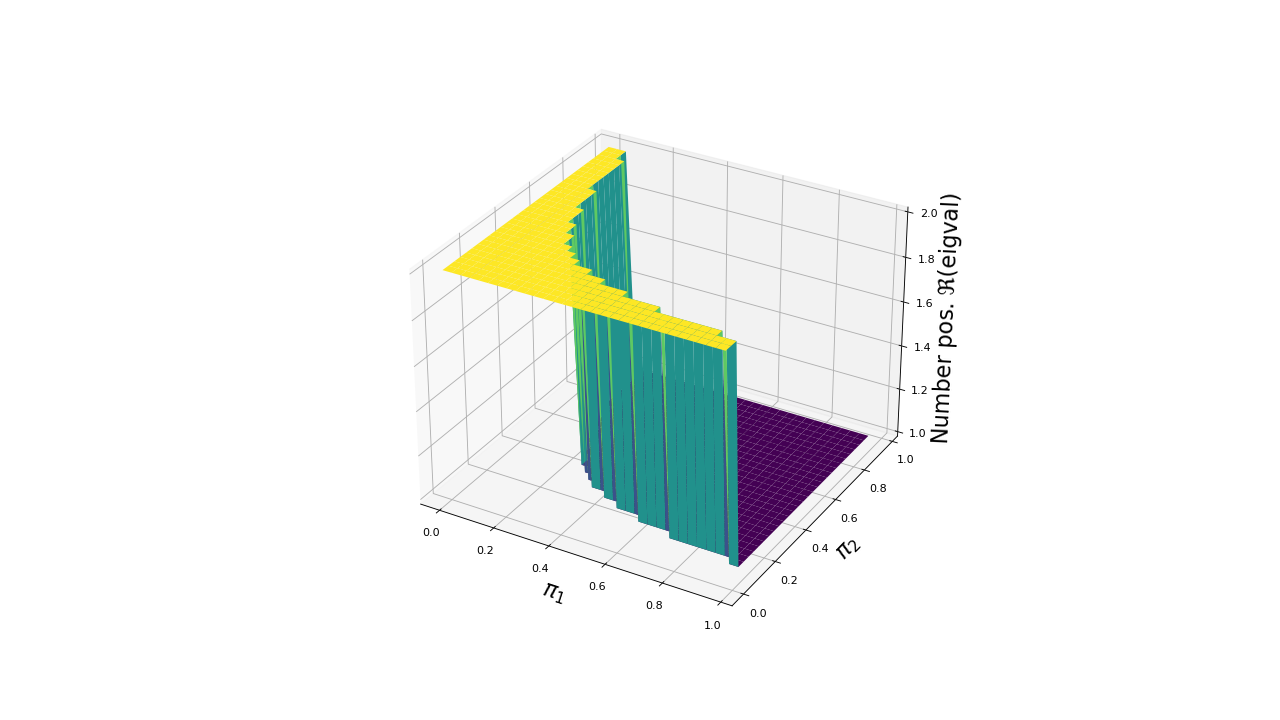

In [17]:
# calculation and plot for number of eigenvalues with positive real part

def count_pos(array: np.array) -> int:
    counter = 0
    for elem in array:
        if elem > -1e-15:  # hopefully remove error due to computer accuracy
            counter += 1
    return counter


pos_eigs = np.empty(((steps+1), (steps+1)))
for index_1, val_1 in enumerate(pi1):
    for index_2, val_2 in enumerate(pi2):
        pos_eigs[index_1, index_2] = count_pos(
            results[index_1, index_2, :].squeeze())

fig = plt.figure(figsize=(16, 9), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, np.squeeze(pos_eigs), rstride=1,
                cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$\pi_1$', fontsize=20)
ax.set_ylabel(r'$\pi_2$', fontsize=20)
ax.set_zlabel(r"Number pos. $\Re$(eigval)", fontsize=20)

None  # suppress output